In [16]:
##### VGME Stock Price Analysis Code
# Dependencies

import gmaps
import numpy as np
import pandas as pd

import requests
import json

import scipy.stats as st
from scipy.stats import linregress

from matplotlib import pyplot as plt

from pprint import pprint

from random import seed
from random import randint

# Time calculations
import time
import datetime
# from datetime import datetime
from time import strftime

# Printing and Output Controls
import sys
import os,csv

In [17]:
# Set up output path 
Output_Data_Path_Folder = "../Output" 
Stock_Data_Input_Path = "../Data/GME from 2002 to 2021.csv"

In [18]:
# read in the csv created in the WeatherPy section
stock_data_df = pd.read_csv(Stock_Data_Input_Path,dtype="object", encoding="utf-8")

In [19]:
# Check data
    # print(stock_data_df.dtypes)
    # stock_data_df.head(2)

In [20]:
# Fix data types
stock_data_df[['Open','High','Low','Close','Adj Close','Volume']] = stock_data_df[['Open','High','Low','Close','Adj Close','Volume']].astype(float)

In [21]:
# Check data again
print(stock_data_df.dtypes)
stock_data_df.head(2)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object


,Date,Open,High,Low,Close,Adj Close,Volume
0,2/13/2002,9.625,10.060,9.525,10.05,6.766666,19054000.0
1,2/14/2002,10.175,10.195,9.925,10.00,6.733003,2755400.0


Line graph for GME Stock Price by Date




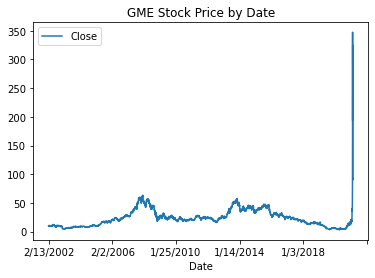

In [22]:
# Plot Stock information by Date
print(f"Line graph for GME Stock Price by Date\n\n") 
Stock_Data_Graph = stock_data_df.plot(x='Date', y="Close", kind="line",title=f"GME Stock Price by Date")

# Write out to png file
plt.savefig(os.path.join(Output_Data_Path_Folder,'GME_Stock_Price_By_Date.png'))
plt.show()

In [24]:
# Create lags and differentials 
for i in range(0, len(stock_data_df)):
# for i in range(0, 10):
    stock_data_df.loc[i, 'Stock_Date']     = datetime.datetime.strptime((stock_data_df.loc[i,"Date"]),'%m/%d/%Y')
    stock_data_df.loc[i, 'Change']  = stock_data_df.loc[i,'Close'] - stock_data_df.loc[i, 'Open']
    stock_data_df.loc[i, 'Abs_Change']  = abs(stock_data_df.loc[i,'Change'])

In [25]:
# stock_data_df.head(1)
# stock_data_df.dtypes
# Set Path to the output file in the analysis folder
DataFrame_File_CSV = 'stock_data_df_CSV_Output.csv'
Output_CSV_Path = os.path.join(Output_Data_Path_Folder,DataFrame_File_CSV)

# Open the data file with write capabilities
stock_data_df.to_csv(Output_CSV_Path, index = False)

Line graphs for GME Stock info by Date




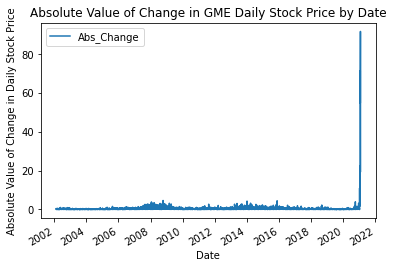

In [26]:
# Plot Stock information by Date
print(f"Line graphs for GME Stock info by Date\n\n") 
Stock_Data_Graph = stock_data_df.plot(x='Stock_Date', y="Abs_Change", kind="line",title=f"Absolute Value of Change in GME Daily Stock Price by Date")

plt.ylabel("Absolute Value of Change in Daily Stock Price")
plt.xlabel("Date")
# Write out to png file
plt.savefig(os.path.join(Output_Data_Path_Folder,'GME_Stock_Diff_By_Date-All.png'))
plt.show()

In [27]:
Date_Limit = datetime.datetime.strptime('12-01-2020', '%m-%d-%Y')
stock_days_of_interest_df = stock_data_df[(stock_data_df["Stock_Date"]) >= Date_Limit]
stock_days_of_interest_df.Date.count()

44

In [28]:
# Set Path to the output file in the analysis folder
DataFrame_File_CSV = 'stock_days_of_interest_df_CSV_Output.csv'
Output_CSV_Path = os.path.join(Output_Data_Path_Folder,DataFrame_File_CSV)

# Open the data file with write capabilities
stock_days_of_interest_df.to_csv(Output_CSV_Path, index = False)

Line graphs for GME Stock info by Date




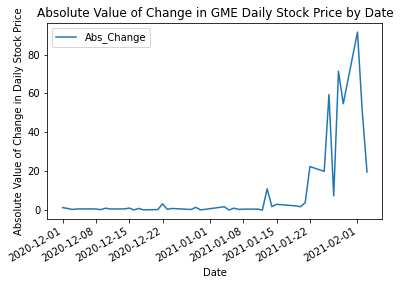

In [29]:
# Plot Stock information by Date
print(f"Line graphs for GME Stock info by Date\n\n") 
Stock_Data_Graph = stock_days_of_interest_df.plot(x='Stock_Date', y="Abs_Change", kind="line",title=f"Absolute Value of Change in GME Daily Stock Price by Date")

plt.ylabel("Absolute Value of Change in Daily Stock Price")
plt.xlabel("Date")
# Write out to png file
plt.savefig(os.path.join(Output_Data_Path_Folder,'GME_Stock_Diff_By_Date.png'))
plt.show()

In [30]:
plt.savefig(os.path.join(Output_Data_Path_Folder,'GME_Stock_Diff_By_Date.png'))
plt.show()

<Figure size 432x288 with 0 Axes>

Line graphs for GME Stock info by Date




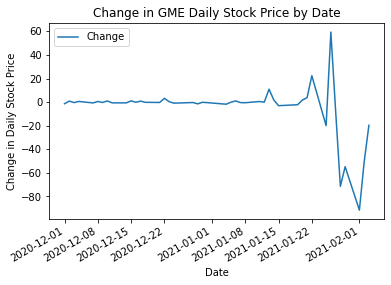

In [31]:
# Plot Stock information by Date
print(f"Line graphs for GME Stock info by Date\n\n") 
Stock_Data_Graph = stock_days_of_interest_df.plot(x='Stock_Date', y="Change", kind="line",title=f"Change in GME Daily Stock Price by Date")

plt.ylabel("Change in Daily Stock Price")
plt.xlabel("Date")
# Write out to png file
plt.savefig(os.path.join(Output_Data_Path_Folder,'GME_Stock_Change_By_Date.png'))
plt.show()